# HOSPITAL PROJECT 

# PREVIOUS DATA REPRESENTATION

# IMPORTING THE LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

READING THE FILE

In [555]:
med=pd.read_excel("E:/Pharmacy 22-25.xlsx")
med.head(3)

,SALE_INVOICE_NO,ITEM_NAME,ITEM_CODE,ITEM_UNIT,ITEM_BATCH,ITEM_EXPIRY_DATE,ITEM_SALE_PRICE,QTY_IN_UNITS,MRP_OF_EACH_ITEM,TOTAL_COST,...,INVOICE_NUMBER,SUPPLIER_WITHID,BILL_STATUS,DOC_ID,DOC_NAME,GST_TOTAL,CGST,SGST,CONSULTATION_OPD_SEQ,VISIT_NUMBER
0,1,DOLO 650,395,TAB,2708,11/2025,2.060670,1,2.060667,2.060000,...,0,0,OK,2,SELF,0.22,0.11,0.11,NaN,NaN
1,2,IPRARITE L RESPULES,321,SURGICALS,1104,8/2024,23.000000,1,23.000000,23.000000,...,0,0,OK,3,S CHANDRASEKHAR,2.46,1.23,1.23,NaN,NaN
2,2,BUNASE 0.5,326,SURGICALS,RS2216,9/2024,226.399994,1,226.399994,226.399994,...,0,0,OK,3,S CHANDRASEKHAR,24.26,12.13,12.13,NaN,NaN


DROPPING UNCESSARY COLUMNS

In [556]:
med.drop(columns=["ITEM_GROSS_SALE_PRICE","SALETYPE","SALE_COUNTER_QTY","SUPPLIERNAME","ITEM_SUPPLIER_ID","MARGIN_PER","VAT_PERCENT","MARGIN_AMT","GRN_NO","DOC_ID","SALE_TAX_CTGRY","Schedule_type","IS_SR","VAT_AMOUNT","INVOICE_NUMBER","SUPPLIER_WITHID","BILL_STATUS","GST_TOTAL","RACK_NAME","CONSULTATION_OPD_SEQ","CGST","SGST","VISIT_NUMBER"],inplace=True)
med.head(3)

,SALE_INVOICE_NO,ITEM_NAME,ITEM_CODE,ITEM_UNIT,ITEM_BATCH,ITEM_EXPIRY_DATE,ITEM_SALE_PRICE,QTY_IN_UNITS,MRP_OF_EACH_ITEM,TOTAL_COST,...,ITEM_CATEGORY,INVOICE_DATE,Items_Per_Pkg,STOCKTYPE,SALE_SEQ_NO,ITEM_PURCHASE_PRICE,MRP_OF_EACH_PACK,COST_PRICE,COST_VALUE,DOC_NAME
0,1,DOLO 650,395,TAB,2708,11/2025,2.060670,1,2.060667,2.060000,...,TAB,2023-04-20,15,Items,CA-1/23-24,30.91,30.91,2.060670,2.060670,SELF
1,2,IPRARITE L RESPULES,321,SURGICALS,1104,8/2024,23.000000,1,23.000000,23.000000,...,SURGICAL,2023-04-23,5,Items,CA-2/23-24,115.00,115.00,23.000000,23.000000,S CHANDRASEKHAR
2,2,BUNASE 0.5,326,SURGICALS,RS2216,9/2024,226.399994,1,226.399994,226.399994,...,RESPULES,2023-04-23,1,Items,CA-2/23-24,1132.00,1132.00,226.399994,226.399994,S CHANDRASEKHAR


CHECKING THE NULL VALUES

In [557]:
med.isnull().sum()

SALE_INVOICE_NO        0
ITEM_NAME              0
ITEM_CODE              0
ITEM_UNIT              0
ITEM_BATCH             0
ITEM_EXPIRY_DATE       0
ITEM_SALE_PRICE        0
QTY_IN_UNITS           0
MRP_OF_EACH_ITEM       0
TOTAL_COST             0
DISCOUNT_AMOUNT        0
FINAL_AMOUNT           0
ITEM_MFR               0
ITEM_CATEGORY          0
INVOICE_DATE           0
Items_Per_Pkg          0
STOCKTYPE              0
SALE_SEQ_NO            0
ITEM_PURCHASE_PRICE    0
MRP_OF_EACH_PACK       0
COST_PRICE             0
COST_VALUE             0
DOC_NAME               0
dtype: int64

REPRESENTING THE NULL VALUES IN THE FORM OF HEAT MAP

<Axes: >

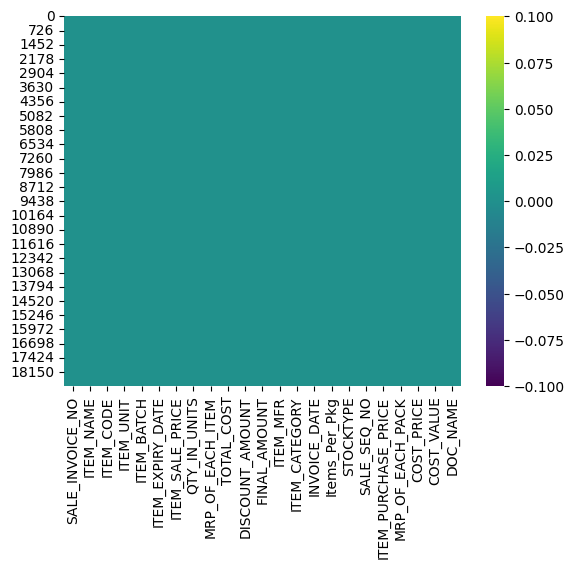

In [558]:
sns.heatmap(med.isnull(),xticklabels=True,cmap="viridis",cbar=True,)

IDENTIFYING THE VALUE COUNTS

In [559]:
med["ITEM_NAME"].value_counts()

ITEM_NAME
NS 100 ML                 469
BD 10CC SYRINGE           383
BD 2CC SYR                357
EASYFIX                   315
VOMIKIND INJ 2ML          304
                         ... 
LEVENUE RTU 1000 MGINJ      1
kelpan 40                   1
MILFLOX EYE DROPS           1
rivaban 10                  1
AIR BED                     1
Name: count, Length: 1146, dtype: int64

IMPORTING THE LIBRARY

In [560]:
from datetime import datetime

CONVERTING DATE TO DATETIME FORMAT

In [561]:
med['INVOICE_DATE'] = pd.to_datetime(med['INVOICE_DATE'])  # Convert 'Date' column to datetime format
med["INVOICE_DATE"]

0       2023-04-20
1       2023-04-23
2       2023-04-23
3       2023-04-23
4       2023-04-23
           ...    
18853   2024-05-30
18854   2024-05-30
18855   2024-05-30
18856   2024-05-30
18857   2024-05-30
Name: INVOICE_DATE, Length: 18858, dtype: datetime64[ns]

VISUALIZING THE YEAR AND MONTH

In [562]:
med['Year'] = med['INVOICE_DATE'].dt.year
med['Month'] = med['INVOICE_DATE'].dt.month
print(med["Year"])
print(med["Month"])

0        2023
1        2023
2        2023
3        2023
4        2023
         ... 
18853    2024
18854    2024
18855    2024
18856    2024
18857    2024
Name: Year, Length: 18858, dtype: int32
0        4
1        4
2        4
3        4
4        4
        ..
18853    5
18854    5
18855    5
18856    5
18857    5
Name: Month, Length: 18858, dtype: int32


APPLYING GROUPBY TO THE REQUIRED PROBELM STATEMENT

In [563]:
# Group by 'ITEM_NAME', 'Year', and 'Month', then aggregate the sum of 'QTY_IN_UNITS'
month_sales = med.groupby(['ITEM_NAME', 'Year', 'Month'])['QTY_IN_UNITS'].sum().reset_index()
month_sales


,ITEM_NAME,Year,Month,QTY_IN_UNITS
0,10CC,2023,4,3
1,10CC,2023,5,83
2,20 CC,2023,5,14
3,20M MANNITOL 100ML,2024,4,12
4,20M MANNITOL 100ML,2024,5,18
...,...,...,...,...
1949,zolfresh 10mg,2024,4,12
1950,zoryl M3,2024,4,150
1951,zoryl M3,2024,5,150
1952,zoryl m3 forte,2024,4,120


CHECKING THE TYPE OF DATASET

In [564]:
# Sort by 'Units Sold' in descending order within each group, then get the top 2 rows of each group
top_3_sold_by_month_year = month_sales.sort_values(by=['Year', 'Month', 'QTY_IN_UNITS'], ascending=[True, True, False]).groupby(['Year', 'Month']).head(3).reset_index(drop=True)

type(top_3_sold_by_month_year)


pandas.core.frame.DataFrame

VISUALIZING THE DATASET

In [565]:
df = pd.DataFrame(top_3_sold_by_month_year)
df

,ITEM_NAME,Year,Month,QTY_IN_UNITS
0,TELMIKIND CT 40,2023,4,90
1,TALO H,2023,4,70
2,B-JOY LSR CAPS,2023,4,60
3,FOLVIT TAB,2023,5,945
4,NS 100ML,2023,5,801
5,PANTOTED,2023,5,240
6,FACE MASK,2024,4,3236
7,STONMONT LC TAB,2024,4,2329
8,OXYBLAZE-G TAB,2024,4,1670
9,MINK POWER TAB,2024,5,2362


CONVERTING THE NUMBER MONTH TO MONTH NAMES

In [566]:
# Convert numerical month to month names

import calendar
df['Month'] = df['Month'].apply(lambda x: calendar.month_name[x])

print(df)

           ITEM_NAME  Year  Month  QTY_IN_UNITS
0    TELMIKIND CT 40  2023  April            90
1             TALO H  2023  April            70
2     B-JOY LSR CAPS  2023  April            60
3         FOLVIT TAB  2023    May           945
4           NS 100ML  2023    May           801
5           PANTOTED  2023    May           240
6          FACE MASK  2024  April          3236
7    STONMONT LC TAB  2024  April          2329
8     OXYBLAZE-G TAB  2024  April          1670
9     MINK POWER TAB  2024    May          2362
10  PANKIK-40 MG TAB  2024    May          1879
11            ARD SR  2024    May          1760


REPRESENTING THE TOP 3 MEDICINES SOLD PREVIOUSLY BY MONTHS IN THE GRAPHICAL PLOT

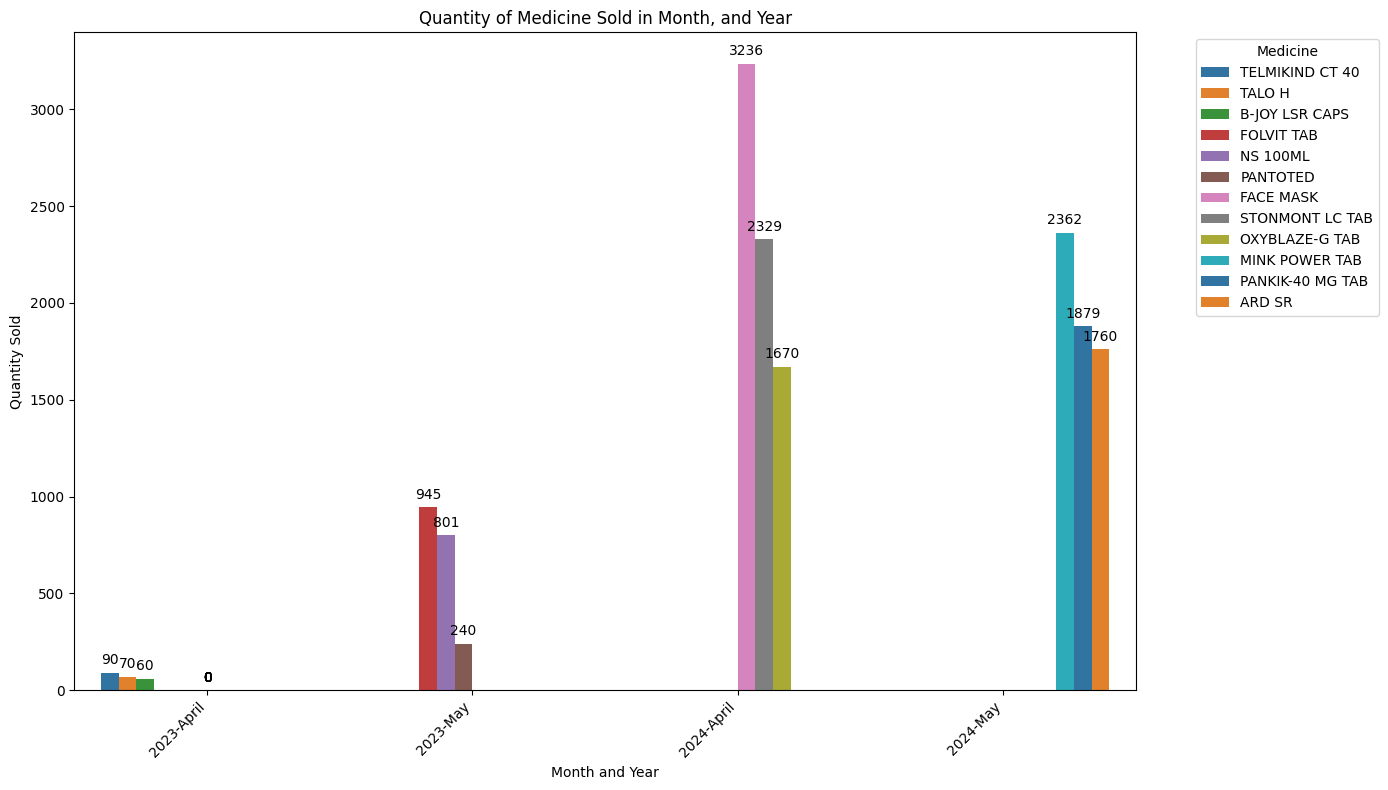

In [567]:

# Create a 'Year-Month' column for better x-axis representation
df['Year-Month'] = df.apply(lambda row: f"{row['Year']}-{row['Month']:02}", axis=1)

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot using seaborn
ax = sns.barplot(data=df, x="Year-Month", y="QTY_IN_UNITS", hue="ITEM_NAME", palette="tab10")

# Add titles and labels
plt.title('Quantity of Medicine Sold in Month, and Year')
plt.xlabel('Month and Year')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its quantity sold
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Offset text slightly above the bar
                textcoords = 'offset points')

# Adjust legend
plt.legend(title="Medicine", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the graph
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

# Inferences:-
        From the above bar plot graph, the instances encountered on the study of the bar plot graph is given below:-

         IN APRIL-2023:-

                  The first top most medicine sold in APRIL-2023 was "TELMIKIND CT 40"              [ITEM TYPE:- TABLET]
                  The second top most medicine sold in APRIL-2023 was "TALO H"                      [ITEM TYPE:- TABLET]
                  The third top most medicine sold in APRIL-2023 was "B-JOY LSR CAPS"               [ITEM TYPE:- CAPSULES]   

         IN MAY-2023:- 
                 The first top most medicine sold in MAY-2023 year was  "FOLVIT TAB"                [ITEM TYPE:- TABLET]
                 The second top most medicine sold in MAY-2023 year was "NS 100 ML"                 [ITEM TYPE:- SURGICALS]
                 The third top most medicine sold in MAY-2023 year was "PANTOTED"                   [ITEM TYPE:- TABLET]
             
         IN APRIL-2024:-
                The first top most medicine sold in APRIL-2024 was "FACE MASK"                      [ITEM TYPE:- SURGICALS]
                The second top most medicine sold in APRIL-2024 was "STONMONT LC TAB"               [ITEM TYPE:- TABLET]
                The third top most medicine sold in APRIL-2024 was "OXYBLAZE-G TAB"                 [ITEM TYPE:- TABLET]

        IN MAY-2024:-
                 The first top most medicine sold in MAY-2024 year was  "MINK POWER TAB TAB"         [ITEM TYPE:- TABLET]
                 The second top most medicine sold in MAY-2024 year was "PANKIK -40MG TAB"           [ITEM TYPE:- TABLET]
                 The third top most medicine sold in MAY-2024 year was "ARD SR"                      [ITEM TYPE:- TABLET]

REPRESENTING THE TOP 3 MEDICINES SOLD PREVIOUSLY BY YEARS IN THE GRAPHICAL PLOT

In [568]:
top_3_sold_by_month_year = month_sales.sort_values(by=['Year','QTY_IN_UNITS'], ascending=[True, False]).groupby(['Year']).head(3).reset_index(drop=True)
top_3_sold_by_month_year

,ITEM_NAME,Year,Month,QTY_IN_UNITS
0,FOLVIT TAB,2023,5,945
1,NS 100ML,2023,5,801
2,PANTOTED,2023,5,240
3,FACE MASK,2024,4,3236
4,MINK POWER TAB,2024,5,2362
5,STONMONT LC TAB,2024,4,2329


C:\Users\naren\AppData\Local\Temp\ipykernel_9476\3798520159.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_per_year = med_agg.groupby('Year').apply(lambda x: x.nlargest(3, 'QTY_IN_UNITS')).reset_index(drop=True)


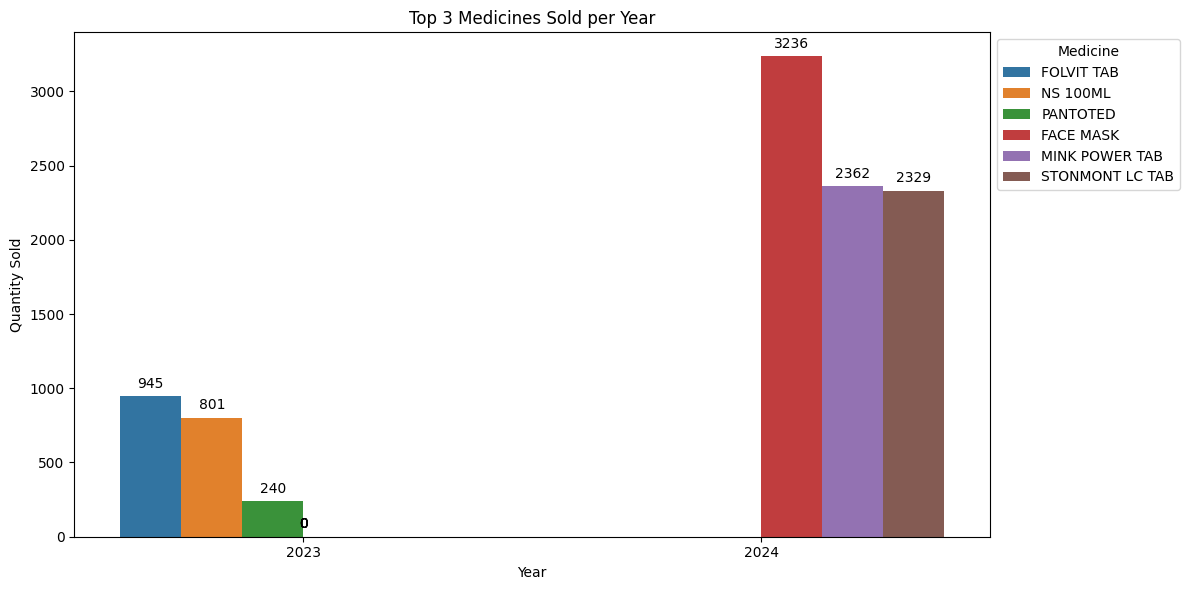

In [569]:
# Aggregate total quantity sold for each medicine in each year
med_agg = df.groupby(['Year', 'ITEM_NAME'])['QTY_IN_UNITS'].sum().reset_index()

# Identify top 3 medicines for each year
top_3_per_year = med_agg.groupby('Year').apply(lambda x: x.nlargest(3, 'QTY_IN_UNITS')).reset_index(drop=True)

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_3_per_year, x='Year', y='QTY_IN_UNITS', hue='ITEM_NAME', dodge=True)
plt.title('Top 3 Medicines Sold per Year')
plt.xlabel('Year')
plt.ylabel('Quantity Sold')
plt.legend(title='Medicine', bbox_to_anchor=(1, 1))

# Adding annotations (counts) on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

# Inferences:-
           From the above bar plot graph, the instances encountered on the study of the bar plot graph is given below:-
           
           In 2023:-
            
               The first top most medicine sold in 2023 year was  "FOLVIT TAB"                [ITEM TYPE:- TABLET]
               The second top most medicine sold in 2023 year was "NS 100 ML"                 [ITEM TYPE:- SURGICALS]
               The third top most medicine sold in 2023 year was "PANTOTED"                   [ITEM TYPE:- TABLET]

          In 2024:-

               The first top most medicine sold in 2024 year was  "FACE MASK"                  [ITEM TYPE:- SURGICALS]
               The second top most medicine sold in 2024 year was "MINK POWEWR TAB"            [ITEM TYPE:- TABLET]
               The third top most medicine sold in 2024 year was "STONMONT LC TAB"              [ITEM TYPE:- TABLET]

# FUTURE PREDICTION

FOR OBTAINING THE FUTURE PREDICTION

In [570]:
# Step 1: Aggregate data by ITEM_NAME
total_sales = df.groupby('ITEM_NAME')['QTY_IN_UNITS'].sum().reset_index()

# Step 2: Forecasting for the next 12 months
def forecast_next_12_months(df):
    # Calculate average sales for each ITEM_NAME
    avg_sales = df.groupby('ITEM_NAME')['QTY_IN_UNITS'].mean().reset_index()

    # Create a forecast for the next 12 months based on average sales
    forecast = avg_sales.copy()
    forecast['Forecast'] = forecast['QTY_IN_UNITS']  # Example: Using average as forecast for simplicity
    forecast['Month'] = pd.date_range(start='2024-06-01', periods=12, freq='M').strftime('%B-%Y')
    
    return forecast[['ITEM_NAME', 'Month', 'Forecast']]

# Step 3: Generate forecast
forecast_next_12 = forecast_next_12_months(df)

print("Forecasted sales for the next 12 months:")
print(forecast_next_12)

Forecasted sales for the next 12 months:
           ITEM_NAME           Month  Forecast
0             ARD SR       June-2024    1760.0
1     B-JOY LSR CAPS       July-2024      60.0
2          FACE MASK     August-2024    3236.0
3         FOLVIT TAB  September-2024     945.0
4     MINK POWER TAB    October-2024    2362.0
5           NS 100ML   November-2024     801.0
6     OXYBLAZE-G TAB   December-2024    1670.0
7   PANKIK-40 MG TAB    January-2025    1879.0
8           PANTOTED   February-2025     240.0
9    STONMONT LC TAB      March-2025    2329.0
10            TALO H      April-2025      70.0
11   TELMIKIND CT 40        May-2025      90.0


C:\Users\naren\AppData\Local\Temp\ipykernel_9476\1966679656.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast['Month'] = pd.date_range(start='2024-06-01', periods=12, freq='M').strftime('%B-%Y')


VISUALIZING THE DATASET IN TERMS OF PROBLEM STATEMENT

In [571]:
df

,ITEM_NAME,Year,Month,QTY_IN_UNITS,Year-Month
0,TELMIKIND CT 40,2023,April,90,2023-April
1,TALO H,2023,April,70,2023-April
2,B-JOY LSR CAPS,2023,April,60,2023-April
3,FOLVIT TAB,2023,May,945,2023-May
4,NS 100ML,2023,May,801,2023-May
5,PANTOTED,2023,May,240,2023-May
6,FACE MASK,2024,April,3236,2024-April
7,STONMONT LC TAB,2024,April,2329,2024-April
8,OXYBLAZE-G TAB,2024,April,1670,2024-April
9,MINK POWER TAB,2024,May,2362,2024-May


CREATING AN OUTPUT DATA FOR THE REQUIRED PROBLEM STATEMENT FROM THE DATASET 

In [572]:
# Define the file path
excel_file_path = 'E:/output_data.xlsx'

try:
    # Export the DataFrame to Excel without the index column
    med.to_excel(excel_file_path, index=False, engine='openpyxl')
    print(f"DataFrame successfully exported to '{excel_file_path}'.")
except PermissionError as e:
    print(f"PermissionError: {e}")
    print("Make sure you have permission to write to the specified location.")
except Exception as e:
    print(f"Error: {e}")

DataFrame successfully exported to 'E:/output_data.xlsx'.


IMPORTING LIBRARY

In [573]:
from statsmodels.tsa.arima.model import ARIMA


# FUTURE PREDICITON FOR UPCOMING MONTHS


REPRESENTING THE TOP 3 MEDICINES SOLD IN FUTURE BY MONTHS IN THE GRAPHICAL PLOT

C:\Users\naren\AppData\Local\Temp\ipykernel_9476\1975982926.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3_sales['Date'] = top_3_sales.apply(lambda row: parse_date(row['Year'], row['Month']), axis=1)
c:\Users\naren\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\naren\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._in

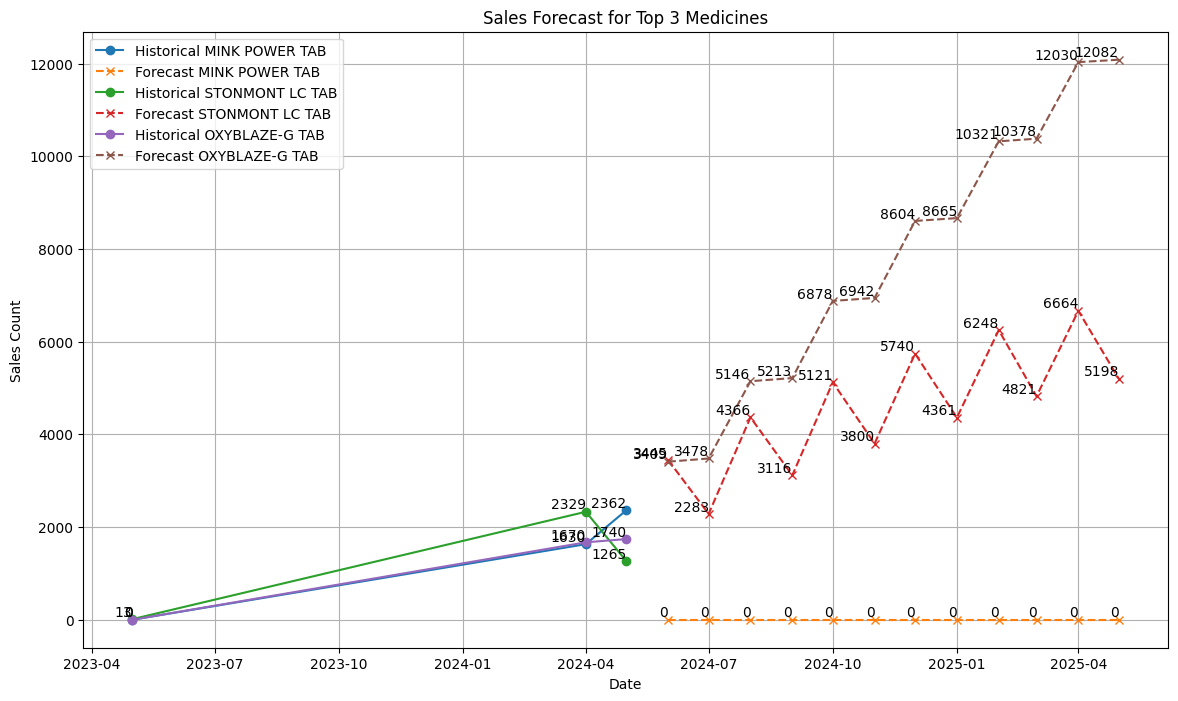

In [574]:
# Filter out erroneous data
df_filtered = med[(med['Year'] > 2000) & (med['Year'] < 2030)]

# Aggregate the data to get monthly sales counts for each medicine
monthly_sales = df_filtered.groupby(['Year', 'Month', 'ITEM_NAME'])['QTY_IN_UNITS'].sum().reset_index()

# Summarize total sales for each medicine across the entire dataset
total_sales = monthly_sales.groupby('ITEM_NAME')['QTY_IN_UNITS'].sum().reset_index()

# Identify the top 3 medicines based on total sales
top_3_medicines = total_sales.nlargest(3, 'QTY_IN_UNITS')['ITEM_NAME'].tolist()

# Filter the data to include only the top 3 medicines
top_3_sales = monthly_sales[monthly_sales['ITEM_NAME'].isin(top_3_medicines)]

# Define a function to correctly parse the 'Year' and 'Month' into a datetime object
def parse_date(year, month):
    try:
        return pd.to_datetime(f"{year}-{month}", format='%Y-%B')  # Handle 'Month' as full month name
    except ValueError:
        return pd.to_datetime(f"{year}-{month}", format='%Y-%m')  # Handle 'Month' as numeric month

# Apply the parse_date function to create a 'Date' column
top_3_sales['Date'] = top_3_sales.apply(lambda row: parse_date(row['Year'], row['Month']), axis=1)

# Pivot the data to have a time series format suitable for forecasting
pivot_data = top_3_sales.pivot_table(index='Date', columns='ITEM_NAME', values='QTY_IN_UNITS', fill_value=0)

# Ensure the data is sorted by date
pivot_data = pivot_data.sort_index()

# Function to fit and forecast using ARIMA model
def forecast_sales(data, steps=12):
    model = ARIMA(data, order=(5, 1, 0))  # (p, d, q) parameters can be tuned
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Forecast the future sales counts for each of the top 3 medicines
forecasts = {}
forecast_steps = 12  # Number of months to forecast

for medicine in top_3_medicines:
    forecasts[medicine] = forecast_sales(pivot_data[medicine], steps=forecast_steps)

# Extend the date range to include future dates for the forecast period
future_dates = pd.date_range(start=pivot_data.index[-1] + pd.offsets.MonthBegin(), periods=forecast_steps, freq='MS')

# Create a DataFrame to hold the forecasted values and their dates
forecast_data = pd.DataFrame(index=future_dates, columns=top_3_medicines)

# Populate the forecast DataFrame with the forecasted values
for medicine in top_3_medicines:
    forecast_data[medicine] = forecasts[medicine].values

# Plot the historical and forecasted data
plt.figure(figsize=(14, 8))
for medicine in top_3_medicines:
    # Plot historical data
    plt.plot(pivot_data.index, pivot_data[medicine], marker='o', label=f'Historical {medicine}')
    for x, y in zip(pivot_data.index, pivot_data[medicine]):
        plt.text(x, y, f'{y:.0f}', ha='right', va='bottom')
    
    # Plot forecasted data
    plt.plot(forecast_data.index, forecast_data[medicine], marker='x', linestyle='--', label=f'Forecast {medicine}')
    for x, y in zip(forecast_data.index, forecast_data[medicine]):
        plt.text(x, y, f'{y:.0f}', ha='right', va='bottom')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales Count')
plt.title('Sales Forecast for Top 3 Medicines')
plt.grid(True)
plt.show()

# INFERENCES:-

From the above graph with respect to the existing dataset given, the future analysis is hereby below:-

        The First Medicine is "MINK POWER TAB"
        The Second Medicine is "STONMONT LC TAB"
        The Third Medicine is "OXYBLAZE-G TAB"

There are two types of data represented on the graph:-
1. Historical data - About the Previous data
2. Forecasting data - Predict the future data

REPRESENTATION:-

        The Blue dot line is represented as the Historical "MINK POWER TAB" 
        The Orange star line is represented as the Forecast "MINK POWER TAB"
        The Green dot line is represented as the Historical "STONMONT LC TAB"
        The Red star line is represented as the Forecast "STONMONT LC TAB"
        The Purple dot line is represented as the Historical "OXYBLAZE-G TAB"
        The Brown star line is represented as the Forecast "OXYBLAZE-G TAB"

COUNT:-

        MINK POWER TAB has a gradual increase of the count from 3405 - 12082 in the upcoming 12 Months.
        STONMONT TAB has a gradual fluctuation (Increase and Decrease) of the count from 2283 - 5198 in the upcoming 12 Months.
        OXYBLAZE-G TAB has no impact in the future with a count of 0, whereas previously it had an impact with a count of 0 - 1740


  


REPRESENTING THE TOP 3 MEDICINES SOLD IN FUTURE BY YEARS IN THE GRAPHICAL PLOT

C:\Users\naren\AppData\Local\Temp\ipykernel_9476\2348160624.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3_sales['Date'] = top_3_sales.apply(lambda row: parse_date(row['Year'], row['Month']), axis=1)
c:\Users\naren\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\naren\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._in

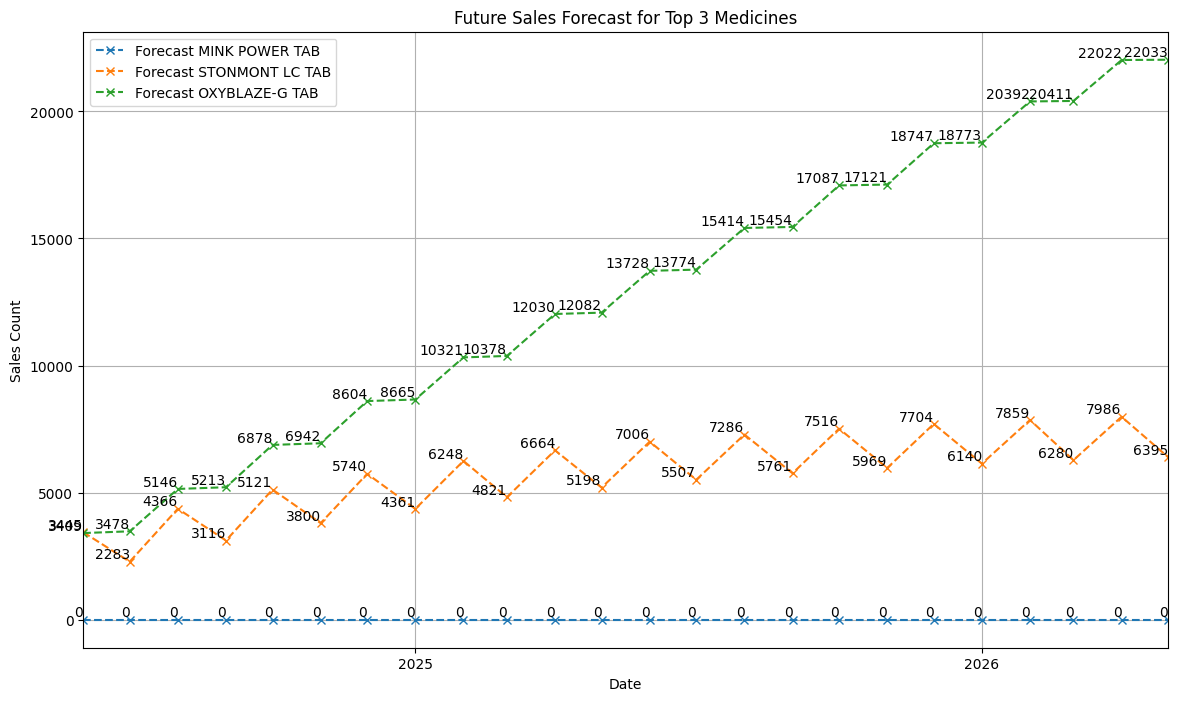

In [575]:
# Filter out erroneous data
df_filtered = med[(med['Year'] > 2000) & (med['Year'] < 2030)]

# Aggregate the data to get monthly sales counts for each medicine
monthly_sales = df_filtered.groupby(['Year', 'Month', 'ITEM_NAME'])['QTY_IN_UNITS'].sum().reset_index()

# Summarize total sales for each medicine across the entire dataset
total_sales = monthly_sales.groupby('ITEM_NAME')['QTY_IN_UNITS'].sum().reset_index()

# Identify the top 3 medicines based on total sales
top_3_medicines = total_sales.nlargest(3, 'QTY_IN_UNITS')['ITEM_NAME'].tolist()

# Filter the data to include only the top 3 medicines
top_3_sales = monthly_sales[monthly_sales['ITEM_NAME'].isin(top_3_medicines)]

# Define a function to correctly parse the 'Year' and 'Month' into a datetime object
def parse_date(year, month):
    try:
        return pd.to_datetime(f"{year}-{month}", format='%Y-%B')  # Handle 'Month' as full month name
    except ValueError:
        return pd.to_datetime(f"{year}-{month}", format='%Y-%m')  # Handle 'Month' as numeric month

# Apply the parse_date function to create a 'Date' column
top_3_sales['Date'] = top_3_sales.apply(lambda row: parse_date(row['Year'], row['Month']), axis=1)

# Pivot the data to have a time series format suitable for forecasting
pivot_data = top_3_sales.pivot_table(index='Date', columns='ITEM_NAME', values='QTY_IN_UNITS', fill_value=0)

# Ensure the data is sorted by date
pivot_data = pivot_data.sort_index()

# Function to fit and forecast using ARIMA model
def forecast_sales(data, steps=36):
    model = ARIMA(data, order=(5, 1, 0))  # (p, d, q) parameters can be tuned
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Forecast the future sales counts for each of the top 3 medicines
forecasts = {}
forecast_steps = 24 # Number of months to forecast (3 years)

for medicine in top_3_medicines:
    forecasts[medicine] = forecast_sales(pivot_data[medicine], steps=forecast_steps)

# Extend the date range to include future dates for the forecast period
future_dates = pd.date_range(start=pivot_data.index[-1] + pd.offsets.MonthBegin(), periods=forecast_steps, freq='MS')

# Create a DataFrame to hold the forecasted values and their dates
forecast_data = pd.DataFrame(index=future_dates, columns=top_3_medicines)

# Populate the forecast DataFrame with the forecasted values
for medicine in top_3_medicines:
    forecast_data[medicine] = forecasts[medicine].values

# Plot only the forecasted data
plt.figure(figsize=(14, 8))
for medicine in top_3_medicines:
    # Plot forecasted data
    plt.plot(forecast_data.index, forecast_data[medicine], marker='x', linestyle='--', label=f'Forecast {medicine}')
    for x, y in zip(forecast_data.index, forecast_data[medicine]):
        plt.text(x, y, f'{y:.0f}', ha='right', va='bottom')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales Count')
plt.title('Future Sales Forecast for Top 3 Medicines')
plt.grid(True)

# Format x-axis to show only years and limit to the next 3 years
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.xlim(future_dates[0], future_dates[-1])

plt.show()

# INFERENCES:-
             

From the above graph with respect to the existing dataset given, the future analysis is hereby below:-

        The First Medicine is "MINK POWER TAB"
        The Second Medicine is "STONMONT LC TAB"
        The Third Medicine is "OXYBLAZE-G TAB"

REPRESENTATION:-

        The Blue Star line is represented as the Forecast of "MINK POWER TAB"
        The Orange Star line is represented as the Forecast of "STONMONT LC TAB"
        The Green Star line is represented as the Forecast of "OXYBLAZE-G TAB"

COUNT:-

        MINK POWER TAB has a gradual increase of the count from 3405 - 22033 in the upcoming 2 Years i.e 2025-2026
        STONMONT TAB has a gradual fluctuation (Increase and Decrease) of the count from 2283 - 6395 in the upcoming 2 Years i.e 2025-2026
        OXYBLAZE-G TAB has no impact in the future with a count of 0 in the upcoming 2 Years i.e 2025-2026



# FROM ABOVE, THE REQUIRED PROBLEM STATEMENT IS SOLVED IN TERMS OF PREVIOUS AND FUTURE ANALYSIS FOR THE GIVEN HOSPITAL PHARMACY DATASET 